### Find the most important features

In [1]:
#Import relevant packages:
import sklearn.ensemble
import sklearn.multiclass
import sklearn.model_selection
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#Read in preprocessed dataframes:
featureDf = pd.read_pickle('./processed.files/labelled/featureDfnew')
labelledDf = pd.read_pickle('./processed.files/labelled/labelledDfnew')

#Read in preprocessed numpy arrays:
preProcFeats = np.load('./processed.files/labelled/featuresnew.npy')
preProcLabels = np.load('./processed.files//labelled/labelsnew.npy')

#Use the RandomForest method for the OneVsRestClassifier and specify hyper-parameters:
randForest = sklearn.multiclass.OneVsRestClassifier(sklearn.ensemble.RandomForestClassifier())

clf = sklearn.multiclass.OneVsRestClassifier(estimator=sklearn.ensemble.RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          n_jobs=1)

#Fit the model using the full data set and pull the names of the features as strings from the dataframe:
fitmodel = clf.fit(preProcFeats, preProcLabels)

featureStrs = featureDf.columns.values

fimps = []
features = []

#Create a list with each element one of the feature importance arrays for one of the estimators:
for idx in np.arange(8):
    importance = fitmodel.estimators_[idx].feature_importances_
    fimps.append(importance)
    
featureidxs = np.array([])

for i in np.arange(10):
    
    #Append next highest importance features to new features array & force feature to be ignored for :
    for idx in np.arange(8):
        fimp = fimps[idx]
        maxargs = np.argmax(fimp)
        maxargs = maxargs.astype(int)
        featureidxs = np.append(featureidxs, maxargs).astype(int)    
        fimp[maxargs] = -1
        fimps[idx] = fimp                
    
#Make sure no feature indices are repeated & create new feature list:
featureidxs = np.unique(featureidxs).astype(int)
featurez = featureStrs[featureidxs]
print featurez
    
#print features   

['bestDM' 'DMmin' 'DMstd' 'SNRstd' 'pctZeroDeriv' 'longestRunmaxRun'
 'globalTimeStatsstd' 'globalTimeStatsmax' 'globalTimeStatsposCount'
 'windTimeStatsstd0' 'windTimeStatsstd1' 'windTimeStatsstd3'
 'windTimeStatsstd4' 'windTimeStatsstd7' 'windTimeStatsstd8'
 'windTimeStatsstd10' 'windTimeStatsstd13' 'windTimeStatsminsnr'
 'windTimeStatsmean0' 'windTimeStatsmean8' 'windDedispTimeStatsstd15'
 'windDedispTimeStatsminsnr' 'windDedispTimeStatsmaxmin'
 'windDedispTimeStatsmeansum' 'windDedispTimeStatssnr3'
 'windDedispTimeStatsminmax' 'pixelMin_0_1' 'pixelMean_0_2' 'pixelMean_1_2'
 'pixelMin_2_1' 'pixelMin_4_2' 'pixelMean_5_0' 'pixelMin_6_1'
 'pixelMin_7_2' 'pixelMean_7_2' 'pixelMean_8_2' 'pixelMin_9_2'
 'pixelMin_10_1' 'pixelMean_10_3' 'pixelMin_12_1' 'pixelMean_13_0'
 'pixelMin_13_1' 'pixelMean_15_2' 'pixelstatsrangemean'
 'pixelstatsmeanmedian' 'pixelstatsrangemin' 'GaussianTestslsD'
 'GaussianTestsks0' 'GaussianTestsks1' 'GaussianTestslsp'
 'GaussianTestsswp' 'segGaussianTestsswpsum'
 

## Plot a stacked histogram with each class a different colour

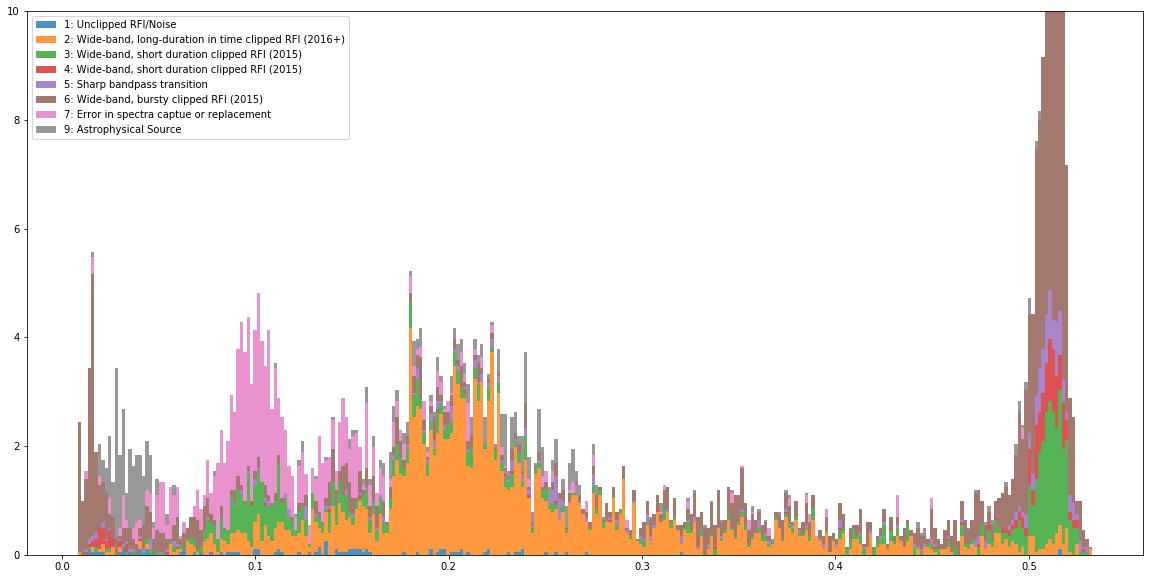

In [9]:
labels = np.array([1,2,3,4,5,6,7,9])
featlist = []

for label in labels:
    ndf = labelledDf[labelledDf['Label'] == label]

    featcol = ndf.as_matrix(columns=['GaussianTestslsD'])
    featlist.append(featcol)

labellegend = '1: Unclipped RFI/Noise', '2: Wide-band, long-duration in time clipped RFI (2016+)', \
'3: Wide-band, short duration clipped RFI (2015)', '4: Wide-band, short duration clipped RFI (2015)', \
'5: Sharp bandpass transition', '6: Wide-band, bursty clipped RFI (2015)', \
'7: Error in spectra captue or replacement', '9: Astrophysical Source'

plt.figure(figsize=(20,10))
plt.hist(featlist, bins = 300, normed = True, stacked = True, alpha = 0.8, label=labellegend)
#plt.yscale('log')
plt.ylim((0,10))
plt.legend()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6eeee5fa10>]], dtype=object)

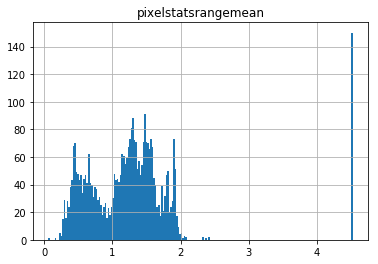

In [3]:
labelDf = labelledDf[labelledDf['Label'] == 2]

#print labelDf['pctZeroDeriv'].mean()

labelDf.hist(column = 'pixelstatsrangemean', bins = 200) 

#plt.title('Percentage of Class 2 Time Series with Zero Gradient')

#plt.savefig('./important.feature.histograms/pctzerodivc2.png')



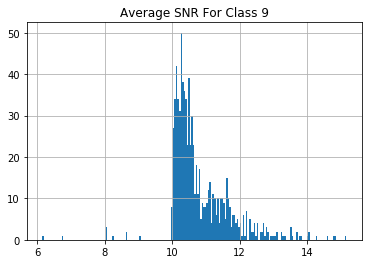

In [4]:
labelDf = labelledDf[labelledDf['Label'] == 9]

#print labelDf['SNRmean'].mean()

labelDf.hist(column = 'SNRmean', bins = 200) 
plt.title('Average SNR For Class 9')
#plt.ylim((0,25))
plt.savefig('./important.feature.histograms/SNRmean9.png')

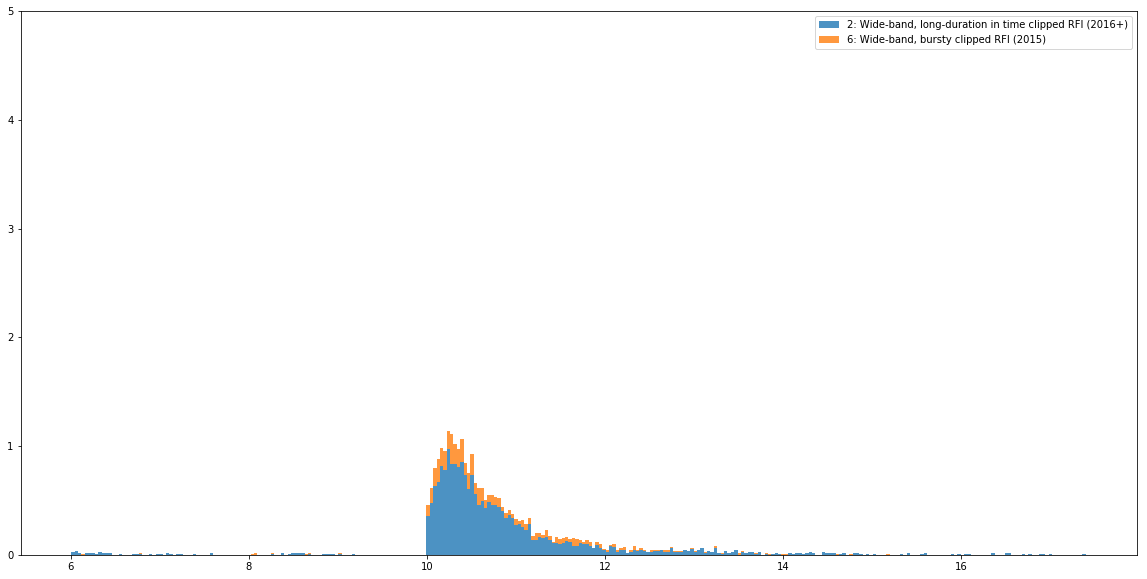

In [15]:
labels = np.array([2,9])
featlist = []

for label in labels:
    ndf = labelledDf[labelledDf['Label'] == label]

    featcol = ndf.as_matrix(columns=['SNRmean'])
    featlist.append(featcol)

labellegend = '2: Wide-band, long-duration in time clipped RFI (2016+)', '6: Wide-band, bursty clipped RFI (2015)'

plt.figure(figsize=(20,10))
plt.hist(featlist, bins = 300, normed = True, stacked = True, alpha = 0.8, label=labellegend)
#plt.yscale('log')
plt.ylim((0,5))
plt.legend()